Libraries

In [14]:
import os
import rasterio
import zipfile
import numpy as np
import matplotlib.pyplot as plt

Unzipping dataset file

In [15]:
zip_file_path = r'C:\Users\karim\OneDrive\Escritorio\CA1 integrated\halfdegree-net-migration-1980-1990-geotiff.zip'
output_folder = r'C:\Users\karim\OneDrive\Escritorio\CA1 integrated'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

Preprocess data

In [16]:
def preprocess_data(data):
    data_min = np.min(data)
    data_max = np.max(data)
    normalized_data = (data - data_min) / (data_max - data_min)
    return normalized_data

Data visualization

Dataset Name: halfdegree-net-migration-1980-1990.tif
Number of Bands: 1
Image Size: 720 x 360
Coordinate Reference System (CRS): EPSG:4326
Geotransform: | 0.50, 0.00,-180.00|
| 0.00,-0.50, 90.00|
| 0.00, 0.00, 1.00|
Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 720, 'height': 360, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.5000000000000001, 0.0, -180.00000000000003,
       0.0, -0.5000000000000001, 90.00000000000001)}


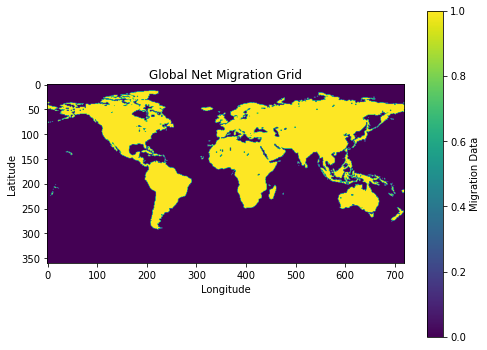

In [23]:
def visualize_data(data):
    plt.figure(figsize=(8, 6))
    plt.imshow(data, cmap='viridis')
    plt.colorbar(label='Migration Data')
    plt.title('Global Net Migration Grid')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

tiff_files = [f for f in os.listdir(output_folder) if f.endswith('.tif')]

for tiff_file in tiff_files:
    tiff_path = os.path.join(output_folder, tiff_file)
    with rasterio.open(tiff_path) as dataset:
        print(f"Dataset Name: {tiff_file}")
        print(f"Number of Bands: {dataset.count}")
        print(f"Image Size: {dataset.width} x {dataset.height}")
        print(f"Coordinate Reference System (CRS): {dataset.crs}")
        print(f"Geotransform: {dataset.transform}")
        print(f"Metadata: {dataset.meta}")

        data = dataset.read(1) 
        preprocessed_data = preprocess_data(data)
        visualize_data(preprocessed_data)